# Pymaceuticals Inc.
---

### Analysis

- 3 observations

1) Naturally, the bigger the mouse was in weight the larger the tumor volume was. But the drug regimen seemed to work at the same quality despite differing weights, for example out of the 4 specially analyzed Capomulin and Ramicane led to smaller final tumor sizes than Infubinol and Ceftamin.
2) Ketapril and Naftisol are the least consistent treatments, for they have the greatest variances and standard variations
3) The gender of mice is pretty even, 51 and 49 percent, and it doesn't appeaer to effect the success of different treatments. 
 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", ])
# Display the data table for preview
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_count = study_data_complete["Mouse ID"].unique().size
mice_count

249

In [40]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = study_data_complete[study_data_complete[['Mouse ID', 'Timepoint']].duplicated(keep = False)]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = study_data_complete.loc[study_data_complete["Mouse ID"]!= "g989"]
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_dataframe["Mouse ID"].unique().size
mice_count

248

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# student_data.groupby(["school_name"])["reading_score"].mean()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

mean_tumour = clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumour = clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor= clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_tumor= clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_err_tumor=clean_dataframe.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_drugs = pd.DataFrame()

summary_drugs["Mean Tumor Volume"] = mean_tumour
summary_drugs["Median Tumor Volume"] = median_tumour
summary_drugs["Variance Tumor Volume"] = variance_tumor
summary_drugs["Standard Deviation Tumor Volume"] = std_dev_tumor
summary_drugs["Standard Error Tumor Volume"] = std_err_tumor

summary_drugs

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_dataframe.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median","var","std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [68]:
bar_data = clean_dataframe["Drug Regimen"].value_counts()
bar_data

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

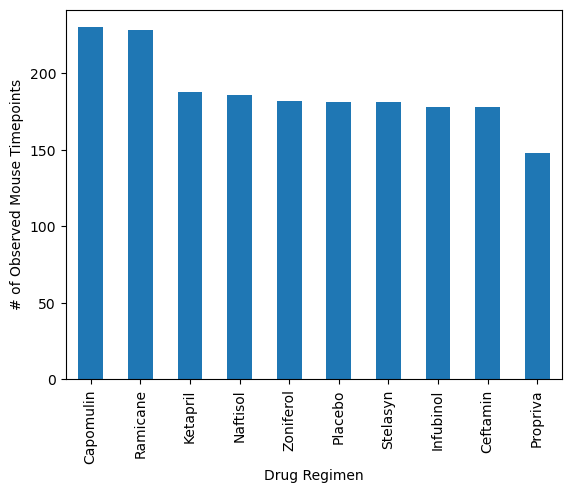

In [125]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data.plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

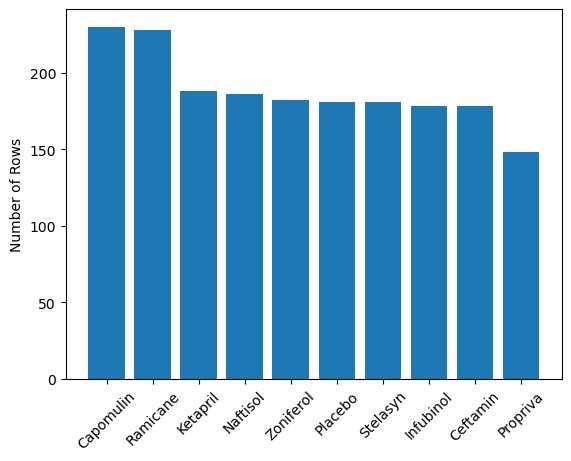

In [128]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_data.index, bar_data.values)
plt.xticks(rotation=45)
plt.ylabel("Number of Rows")
plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64


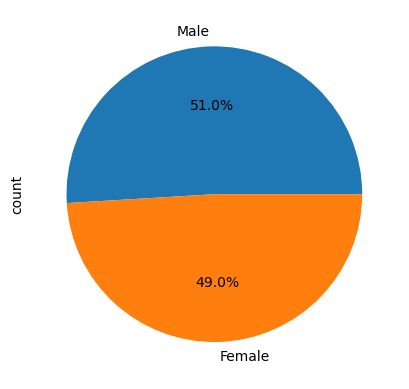

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_dataframe["Sex"].value_counts()
print(pie_data)
pie_data.plot.pie(autopct= "%1.1f%%")
plt.show()

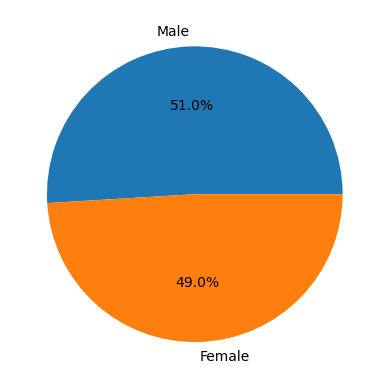

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data.values,labels= pie_data.index,autopct= "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_group = clean_dataframe.groupby(["Mouse ID"])["Timepoint"].max()
mouse_group
# Start by getting the last (greatest) timepoint for each mouse

time_and_mouse = pd.merge(mouse_group, clean_dataframe, on = ["Mouse ID", "Timepoint"], how = "left")
time_and_mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    mice_drug = time_and_mouse.loc[time_and_mouse['Drug Regimen'] == treatment]
    final_tumor_volume = mice_drug.loc[mice_drug['Timepoint'] == mice_drug['Timepoint']]['Tumor Volume (mm3)']
    tumor_vol_data.append(final_tumor_volume)
    

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i, drug in enumerate(treatments):
    quartiles = tumor_vol_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol_data[i][(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]
    
    print(f"{drug} Potential Outliers: {outliers}")
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


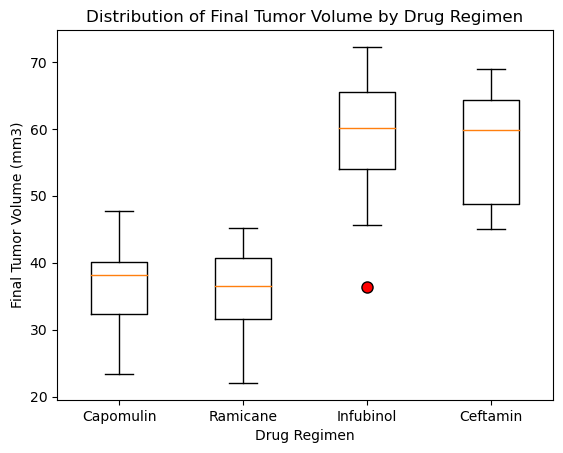

In [107]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
box_volumes = []

for drug in treatments:
    mice_drug=time_and_mouse.loc[time_and_mouse["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    box_volumes.append(mice_drug)
fig, ax = plt.subplots()
ax.boxplot(box_volumes, labels=treatments, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Final Tumor Volume by Drug Regimen')
plt.show()
    

## Line and Scatter Plots

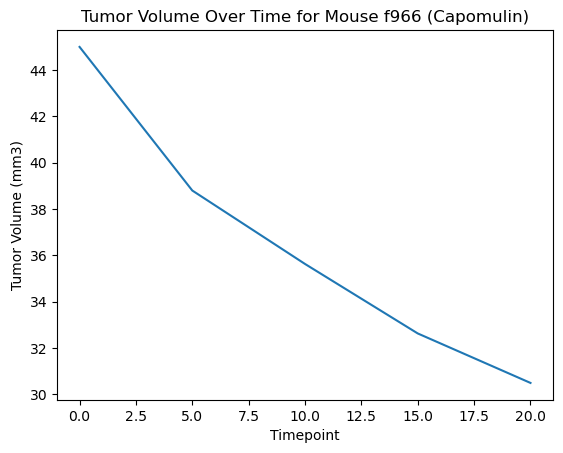

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_dataframe[clean_dataframe["Drug Regimen"] == "Capomulin"]

c_mice = capomulin_data["Mouse ID"].unique()

selected_mouse = c_mice[3]
                                 
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]

                                 
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])
                                 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Over Time for Mouse {selected_mouse} (Capomulin)')

plt.show()

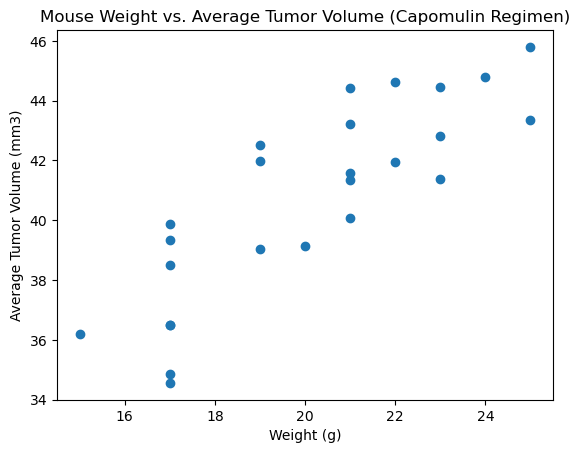

In [112]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

capomulin_and_weight = pd.merge(avg_volume, mouse_metadata, on='Mouse ID')

# Create the scatter plot
plt.scatter(capomulin_and_weight['Weight (g)'], capomulin_and_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()

## Correlation and Regression

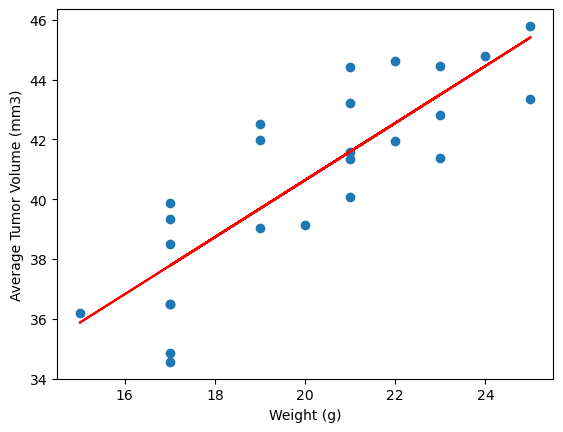

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


In [123]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

x_values = capomulin_and_weight['Weight (g)'] 
y_values = capomulin_and_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")